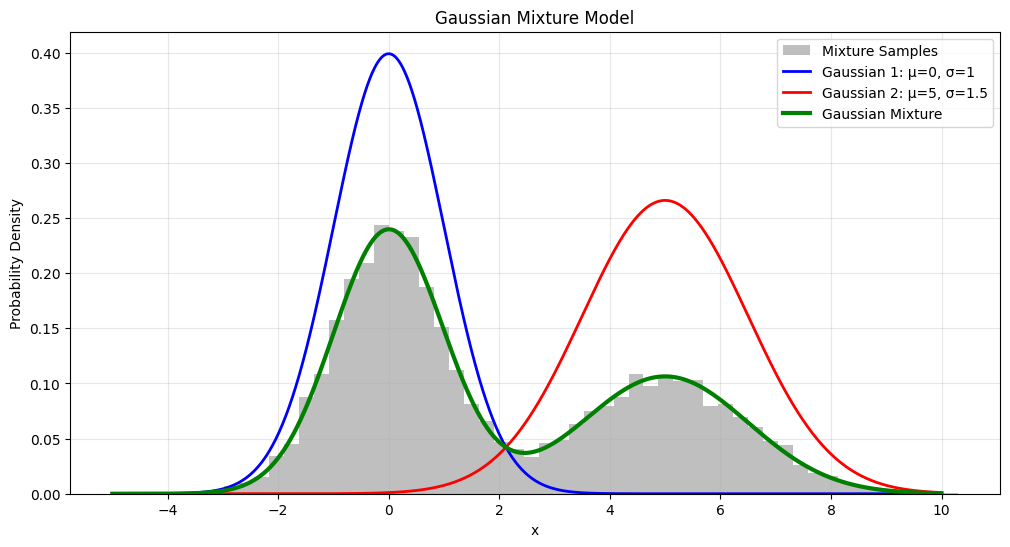

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import kl_div

# Parameters for the two Gaussian distributions
mean1 = 0
std1 = 1
weight1 = 0.6  # 60% weight for the first distribution

mean2 = 5
std2 = 1.5
weight2 = 0.4  # 40% weight for the second distribution

# Generate samples from each distribution
np.random.seed(42)  # For reproducibility
n_samples = 10000

# Generate samples according to the weights
n_samples1 = int(n_samples * weight1)
n_samples2 = n_samples - n_samples1

# Generate random samples from each distribution
samples1 = np.random.normal(mean1, std1, n_samples1)
samples2 = np.random.normal(mean2, std2, n_samples2)

# Combine the samples to create the mixture
mixture_samples = np.concatenate([samples1, samples2])

# Create a range of x values for plotting
x = np.linspace(-5, 10, 1000)

# Calculate the PDFs
pdf1 = norm.pdf(x, mean1, std1)
pdf2 = norm.pdf(x, mean2, std2)
mixture_pdf = weight1 * pdf1 + weight2 * pdf2

# Plotting
plt.figure(figsize=(12, 6))

# Plot histograms of the generated samples
plt.hist(mixture_samples, bins=50, density=True, alpha=0.5, color='gray', label='Mixture Samples')

# Plot the PDFs
plt.plot(x, pdf1, 'b-', linewidth=2, label=f'Gaussian 1: μ={mean1}, σ={std1}')
plt.plot(x, pdf2, 'r-', linewidth=2, label=f'Gaussian 2: μ={mean2}, σ={std2}')
plt.plot(x, mixture_pdf, 'g-', linewidth=3, label='Gaussian Mixture')

plt.title('Gaussian Mixture Model')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()



In [8]:
# Function to demonstrate how to generate samples from a Gaussian mixture model
def generate_gaussian_mixture_samples(n_samples, means, stds, weights):
    """
    Generate samples from a Gaussian mixture model.
    
    Parameters:
    - n_samples: Number of samples to generate
    - means: List of means for each Gaussian component
    - stds: List of standard deviations for each Gaussian component
    - weights: List of weights for each Gaussian component (should sum to 1)
    
    Returns:
    - samples: Generated samples from the mixture
    """
    # Normalize weights if they don't sum to 1
    weights = np.array(weights) / np.sum(weights)
    
    # Determine how many samples to generate from each component
    component_samples = np.random.multinomial(n_samples, weights)
    
    # Generate samples from each component
    samples = []
    for i in range(len(means)):
        if component_samples[i] > 0:
            component = np.random.normal(means[i], stds[i], component_samples[i])
            samples.append(component)
    
    # Combine and shuffle samples
    samples = np.concatenate(samples)
    np.random.shuffle(samples)
    
    return samples


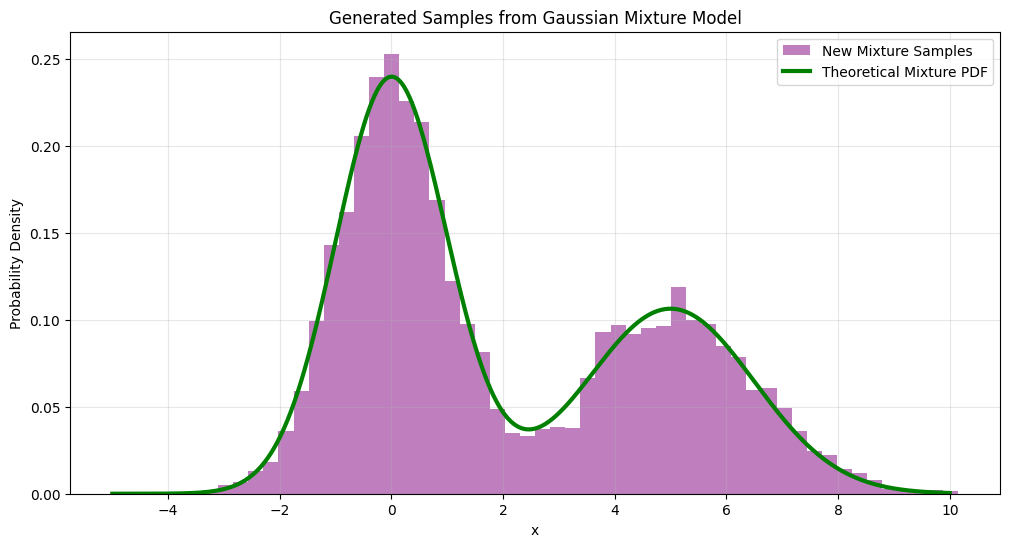

KL Divergence from Distribution 1 to Distribution 2: 5.6832
KL Divergence from Distribution 2 to Distribution 1: 12.7195
KL Divergence (Numerical) from Distribution 1 to Distribution 2: 0.0853
KL Divergence (Numerical) from Distribution 2 to Distribution 1: 0.1791
KL Divergence from Mixture to Distribution 1: 0.0624
KL Divergence from Mixture to Distribution 2: 0.0420


In [9]:
if __name__ == "__main__":
    # Generate 5000 new samples from the same mixture model
    new_samples = generate_gaussian_mixture_samples(
        5000, 
        means=[mean1, mean2], 
        stds=[std1, std2], 
        weights=[weight1, weight2]
    )
    
    # Plot the new samples
    plt.figure(figsize=(12, 6))
    plt.hist(new_samples, bins=50, density=True, alpha=0.5, color='purple', label='New Mixture Samples')
    plt.plot(x, mixture_pdf, 'g-', linewidth=3, label='Theoretical Mixture PDF')
    plt.title('Generated Samples from Gaussian Mixture Model')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.show()
    
    # Calculate KL Divergence between the two Gaussian distributions
    # For two Gaussian distributions, there's an analytical formula for KL divergence:
    # KL(N0||N1) = log(σ1/σ0) + (σ0^2 + (μ0-μ1)^2)/(2σ1^2) - 1/2
    
    def kl_divergence_gaussian(mu0, sigma0, mu1, sigma1):
        """
        Calculate KL divergence between two Gaussian distributions.
        KL(N0||N1) = log(σ1/σ0) + (σ0^2 + (μ0-μ1)^2)/(2σ1^2) - 1/2
        """
        return np.log(sigma1/sigma0) + (sigma0**2 + (mu0-mu1)**2)/(2*sigma1**2) - 0.5
    
    # Calculate KL divergence from distribution 1 to distribution 2
    kl_1_to_2 = kl_divergence_gaussian(mean1, std1, mean2, std2)
    
    # Calculate KL divergence from distribution 2 to distribution 1
    kl_2_to_1 = kl_divergence_gaussian(mean2, std2, mean1, std1)
    
    print(f"KL Divergence from Distribution 1 to Distribution 2: {kl_1_to_2:.4f}")
    print(f"KL Divergence from Distribution 2 to Distribution 1: {kl_2_to_1:.4f}")
    
    # Alternative method: Numerical approximation of KL divergence using scipy's kl_div
    # Note: This requires both distributions to be defined over the same x range
    
    # Ensure PDF values are not exactly zero to avoid numerical issues
    epsilon = 1e-10
    pdf1_safe = pdf1 + epsilon
    pdf2_safe = pdf2 + epsilon
    
    # Normalize to ensure proper probability distributions
    pdf1_safe = pdf1_safe / np.sum(pdf1_safe)
    pdf2_safe = pdf2_safe / np.sum(pdf2_safe)
    
    # Calculate KL divergence numerically
    kl_1_to_2_numerical = np.sum(kl_div(pdf1_safe, pdf2_safe)) * (x[1] - x[0])
    kl_2_to_1_numerical = np.sum(kl_div(pdf2_safe, pdf1_safe)) * (x[1] - x[0])
    
    print(f"KL Divergence (Numerical) from Distribution 1 to Distribution 2: {kl_1_to_2_numerical:.4f}")
    print(f"KL Divergence (Numerical) from Distribution 2 to Distribution 1: {kl_2_to_1_numerical:.4f}")
    
    # Calculate KL divergence for the mixture distribution to each component
    mixture_pdf_safe = mixture_pdf + epsilon
    mixture_pdf_safe = mixture_pdf_safe / np.sum(mixture_pdf_safe)
    
    kl_mixture_to_1 = np.sum(kl_div(mixture_pdf_safe, pdf1_safe)) * (x[1] - x[0])
    kl_mixture_to_2 = np.sum(kl_div(mixture_pdf_safe, pdf2_safe)) * (x[1] - x[0])
    
    print(f"KL Divergence from Mixture to Distribution 1: {kl_mixture_to_1:.4f}")
    print(f"KL Divergence from Mixture to Distribution 2: {kl_mixture_to_2:.4f}")